In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from RegresionL import RegresionLineal

In [3]:
df = pd.read_csv("Data/casas_dev.csv")
df.head(60)

,precio,tipo,Área,metros_cubiertos,unidades,ambientes,pisos,pileta,lat,lon,edad
0,159001.587058,depto,721.976728,703.066245,sqft,5,NaN,False,40.738155,-73.992277,NaN
1,42435.625078,casa,229.512155,113.935741,m2,4,1.0,True,-34.710794,-58.280446,67.202318
2,NaN,depto,73.856399,72.887849,m2,4,NaN,False,-34.704461,-58.256815,2.085965
3,135972.861876,depto,776.709623,747.693158,sqft,5,NaN,False,40.847320,-74.011712,13.835526
4,49758.465224,casa,249.165942,102.023922,m2,5,2.0,False,-34.777778,-58.255182,63.200110
5,7256.796507,casa,170.849136,77.355172,m2,6,2.0,True,-34.693175,-58.240397,4.305892
6,84.244291,ph,115.819630,89.400354,m2,7,1.0,False,-34.787597,-58.272506,48.817601
7,179452.480343,depto,851.461518,830.991007,sqft,2,NaN,False,40.817814,-74.035487,6.673449
8,15591.947673,casa,249.407740,156.759643,m2,10,3.0,False,-34.663340,-58.266494,27.380157
9,221054.994134,depto,830.968041,821.480555,sqft,5,NaN,False,40.726963,-73.939846,14.963269


Elegi 60 datos, porque es la maxima cantidad de filas que pandas me permite representar sin que se corte parte de la tabla y asi no pueda ver su contenido. Origninalmente, mi idea era mostrar el 10% del dataset, pero como despues de 60 pandas te corta la tabla de output, tome este limite.
Habria que cambiar lo siguiente:
- Todas las unidades tendrian que serlas mismas, ya sea que todas se midan en sqft o en m^2.
- Se tendria que saber la cantidad de pisos que tiene el edificio, no deberia ser posible que sea un NaN
- Se tendria que sabe la edad y en caso de que no se tenga registro de cuando se construyo la pileta, deberia eliminarse el dato porque no aporta utilidad a los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   precio            1545 non-null   float64
 1   tipo              1600 non-null   object 
 2   Área              1600 non-null   float64
 3   metros_cubiertos  1600 non-null   float64
 4   unidades          1600 non-null   object 
 5   ambientes         1600 non-null   int64  
 6   pisos             748 non-null    float64
 7   pileta            1600 non-null   bool   
 8   lat               1600 non-null   float64
 9   lon               1600 non-null   float64
 10  edad              1451 non-null   float64
dtypes: bool(1), float64(7), int64(1), object(2)
memory usage: 126.7+ KB


Hay muchos valores NaN, todos estos distribuidos entre precio, pisos y edad; con mayor concentracion en pisos.

In [5]:
df = df.dropna(subset=["precio", "edad"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 1 to 1599
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   precio            1400 non-null   float64
 1   tipo              1400 non-null   object 
 2   Área              1400 non-null   float64
 3   metros_cubiertos  1400 non-null   float64
 4   unidades          1400 non-null   object 
 5   ambientes         1400 non-null   int64  
 6   pisos             655 non-null    float64
 7   pileta            1400 non-null   bool   
 8   lat               1400 non-null   float64
 9   lon               1400 non-null   float64
 10  edad              1400 non-null   float64
dtypes: bool(1), float64(7), int64(1), object(2)
memory usage: 121.7+ KB


In [6]:
df["pisos"] = pd.to_numeric(df["pisos"], errors='coerce').fillna(1).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 1 to 1599
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   precio            1400 non-null   float64
 1   tipo              1400 non-null   object 
 2   Área              1400 non-null   float64
 3   metros_cubiertos  1400 non-null   float64
 4   unidades          1400 non-null   object 
 5   ambientes         1400 non-null   int64  
 6   pisos             1400 non-null   float64
 7   pileta            1400 non-null   bool   
 8   lat               1400 non-null   float64
 9   lon               1400 non-null   float64
 10  edad              1400 non-null   float64
dtypes: bool(1), float64(7), int64(1), object(2)
memory usage: 121.7+ KB


In [7]:
df.head(60)

,precio,tipo,Área,metros_cubiertos,unidades,ambientes,pisos,pileta,lat,lon,edad
1,42435.625078,casa,229.512155,113.935741,m2,4,1.0,True,-34.710794,-58.280446,67.202318
3,135972.861876,depto,776.709623,747.693158,sqft,5,1.0,False,40.847320,-74.011712,13.835526
4,49758.465224,casa,249.165942,102.023922,m2,5,2.0,False,-34.777778,-58.255182,63.200110
5,7256.796507,casa,170.849136,77.355172,m2,6,2.0,True,-34.693175,-58.240397,4.305892
6,84.244291,ph,115.819630,89.400354,m2,7,1.0,False,-34.787597,-58.272506,48.817601
7,179452.480343,depto,851.461518,830.991007,sqft,2,1.0,False,40.817814,-74.035487,6.673449
8,15591.947673,casa,249.407740,156.759643,m2,10,3.0,False,-34.663340,-58.266494,27.380157
9,221054.994134,depto,830.968041,821.480555,sqft,5,1.0,False,40.726963,-73.939846,14.963269
10,4036.981308,depto,80.794153,79.669227,m2,7,1.0,False,-34.811706,-58.278978,1.955496
11,138411.417627,depto,834.642827,805.943032,sqft,6,1.0,False,40.700531,-74.044438,9.442624


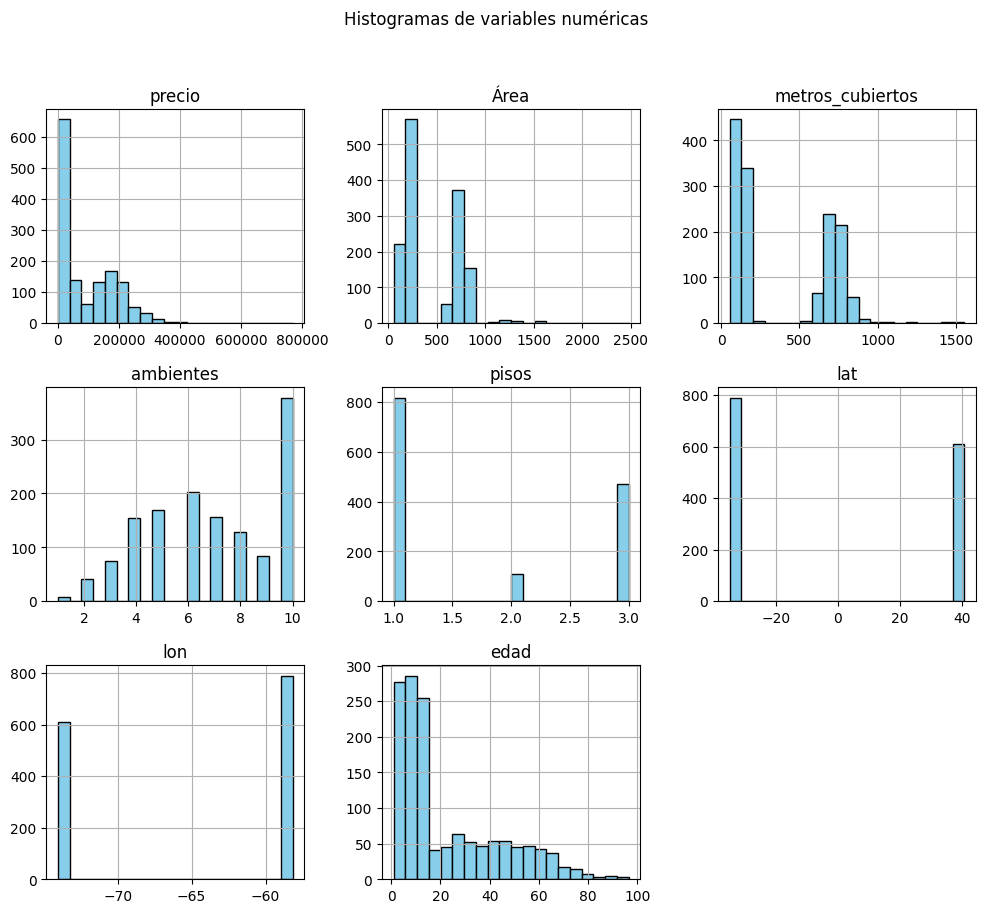

In [8]:
df.hist(figsize=(12,10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Histogramas de variables numéricas")
plt.show()

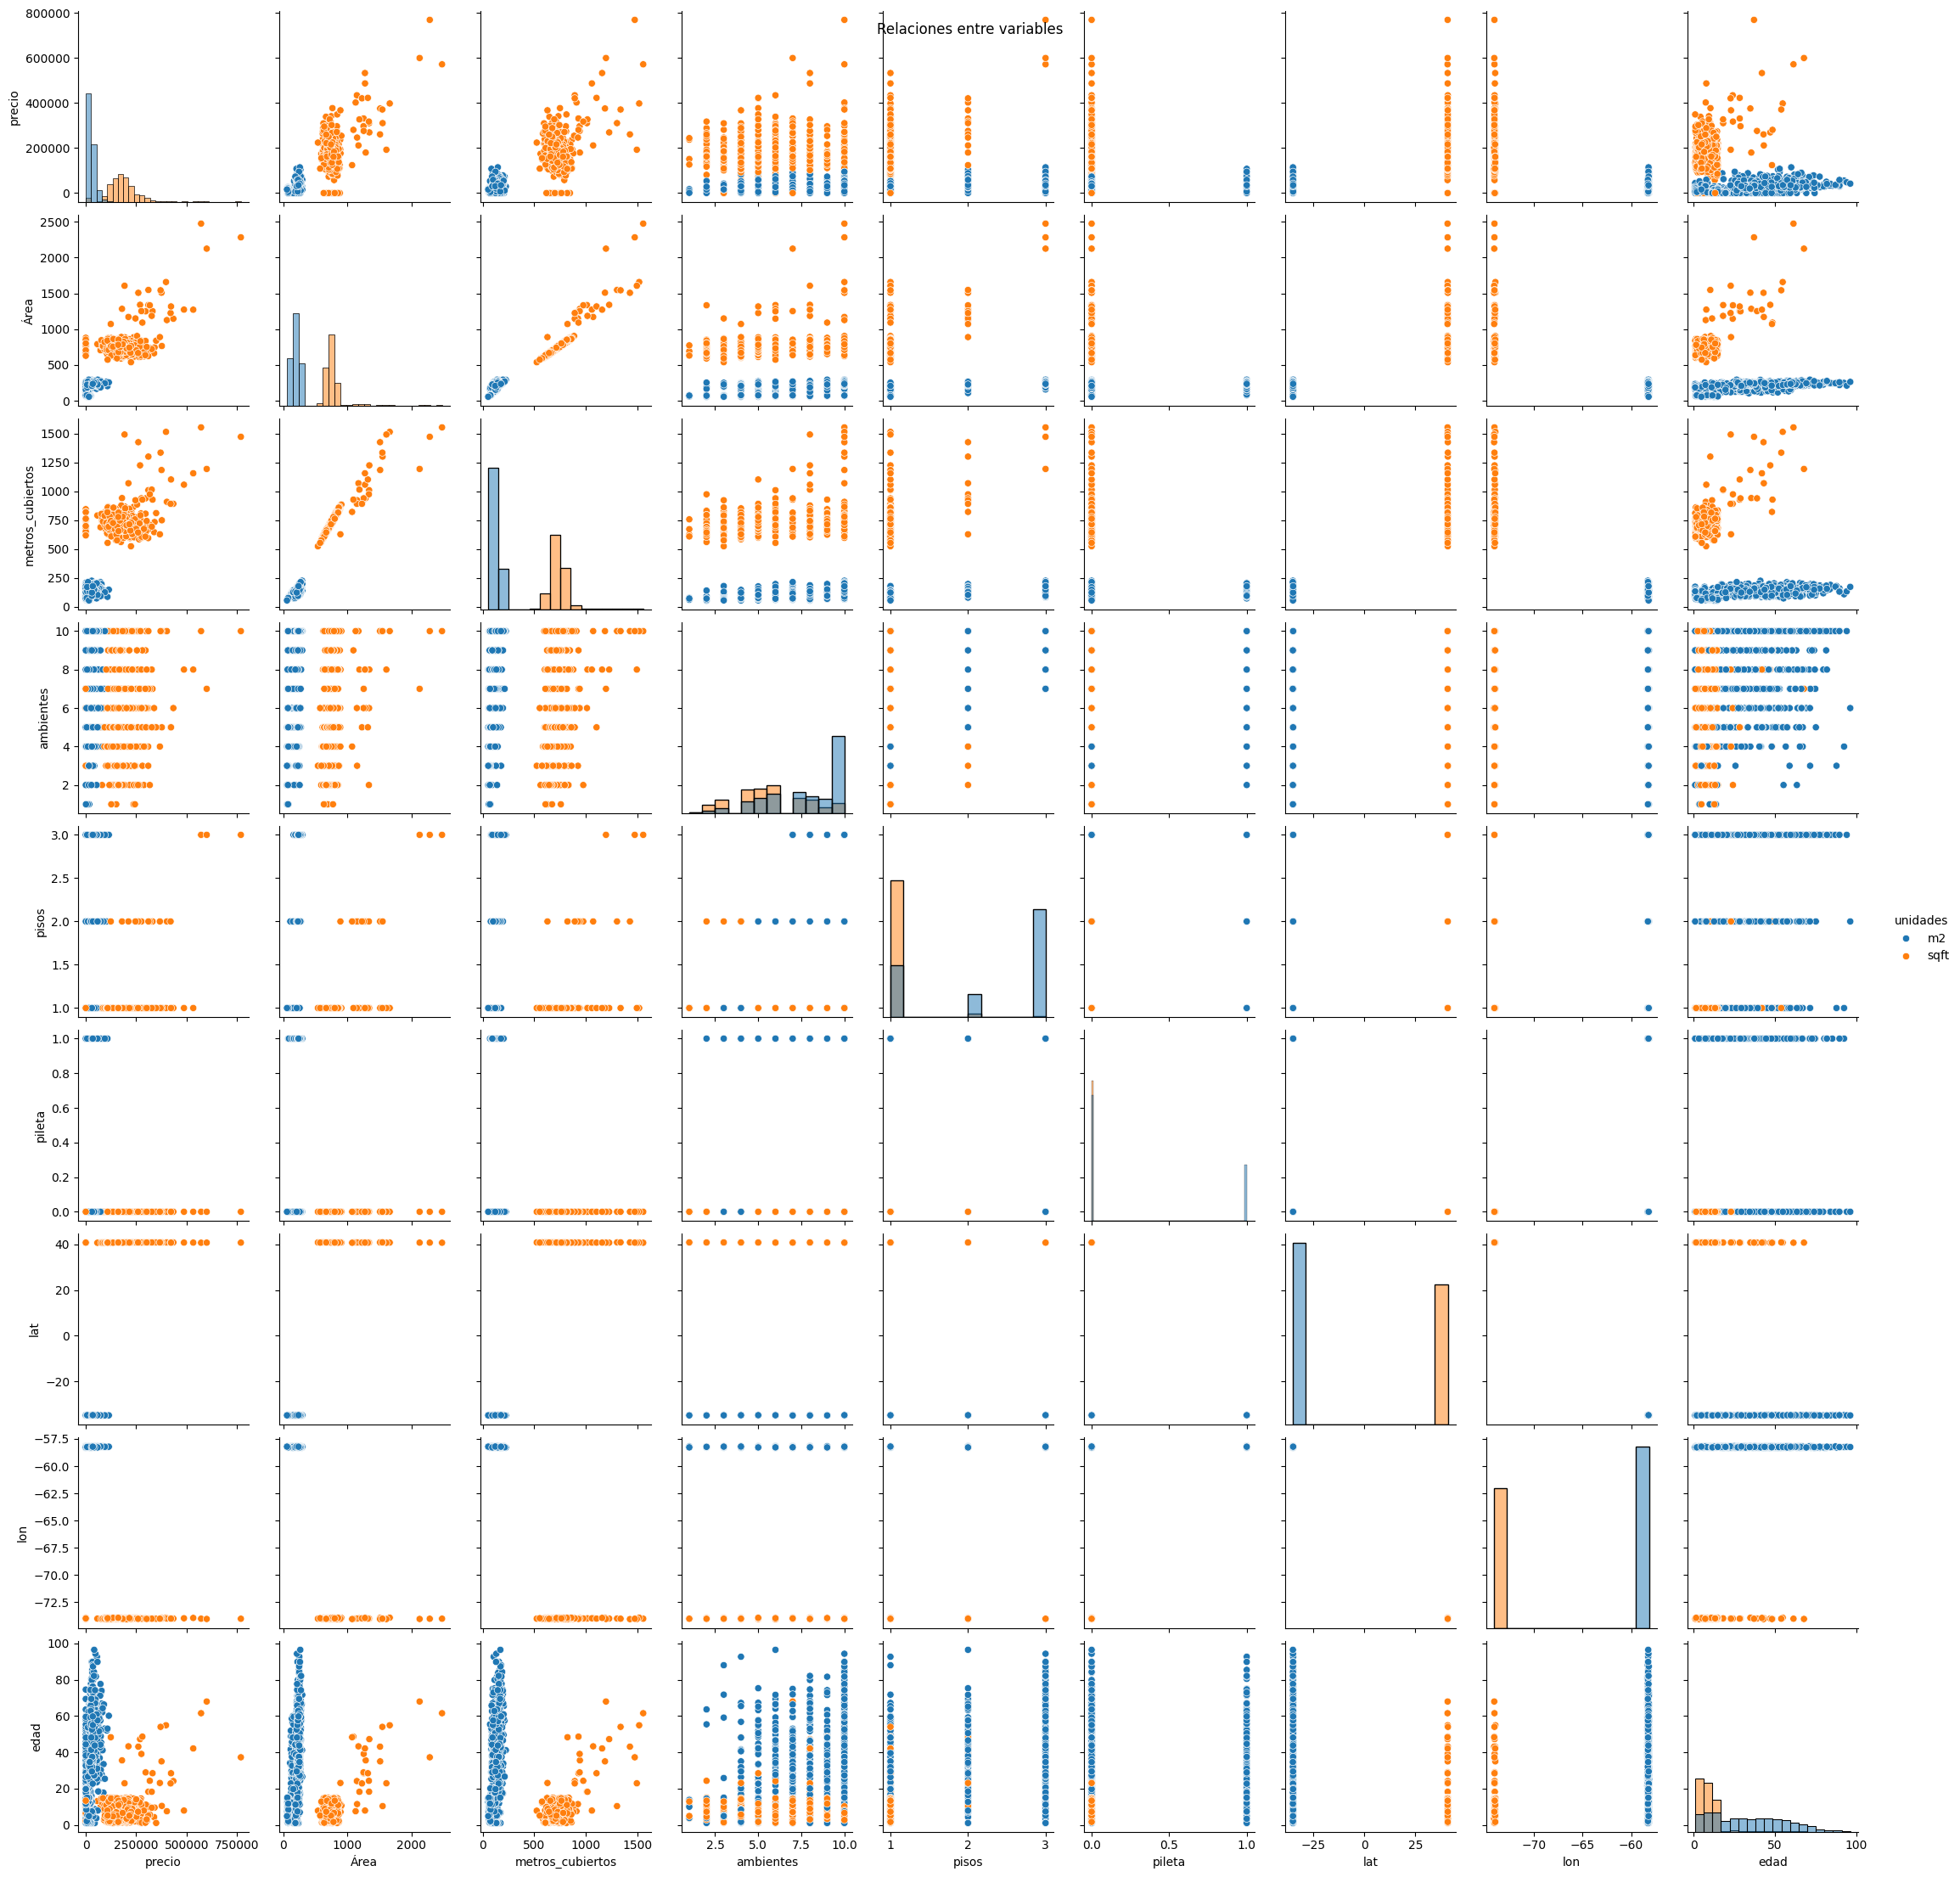

In [9]:
sns.pairplot(df[["precio", "tipo", "Área", "metros_cubiertos", "unidades", "ambientes", "pisos", "pileta", "lat", "lon", "edad"]], hue="unidades", diag_kind="hist")
plt.suptitle("Relaciones entre variables")
plt.show()

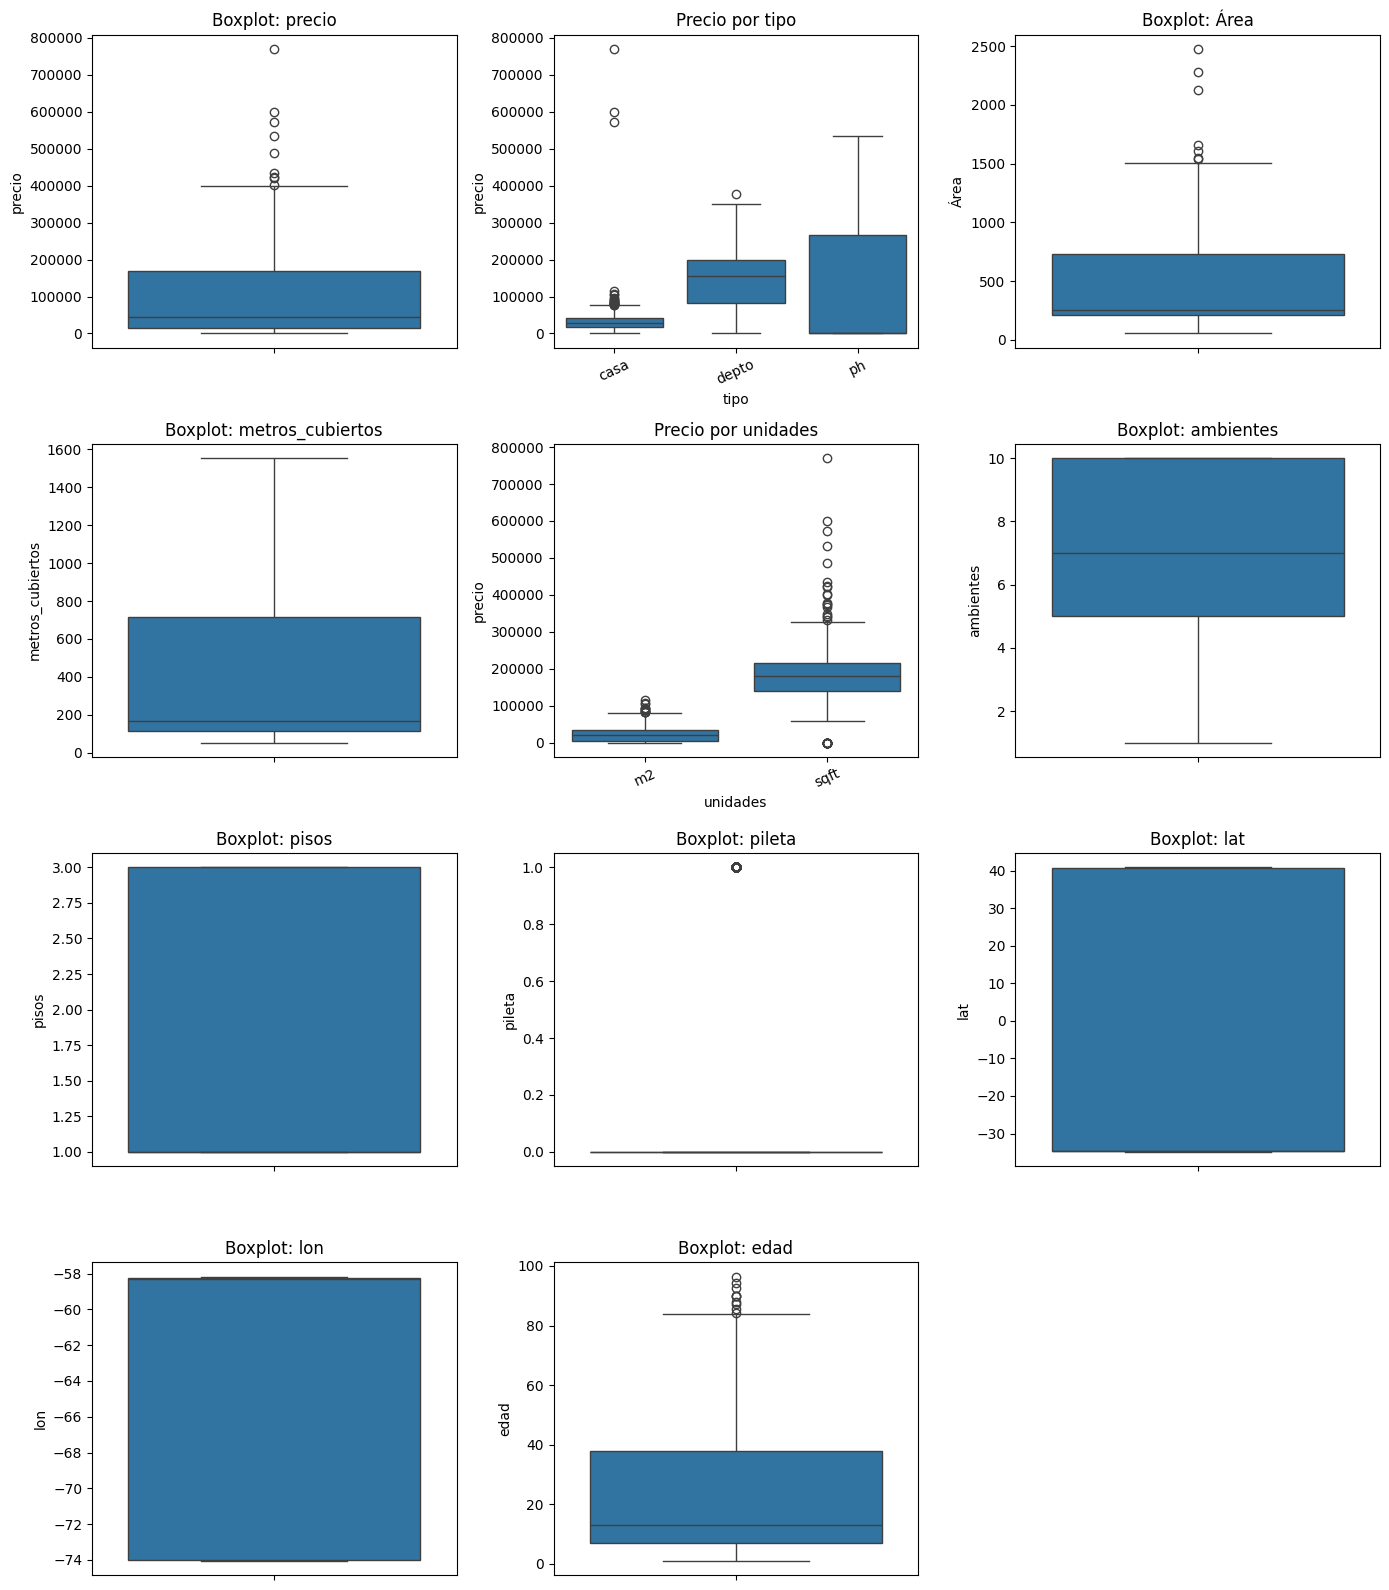

In [10]:

variables = ["precio", "tipo", "Área", "metros_cubiertos", "unidades",
             "ambientes", "pisos", "pileta", "lat", "lon", "edad"]

# --- BOXPLOTS: una grilla que se ajusta al número de variables ---
n_vars = len(variables)
cols = 3
rows = (n_vars + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
axes = axes.ravel()

# Recorro SOLO la cantidad de ejes disponibles
for ax, var in zip(axes, variables):
    if var not in df.columns:
        ax.set_visible(False)
        continue
    # si es numérica -> boxplot univariado
    if pd.api.types.is_numeric_dtype(df[var]):
        sns.boxplot(y=df[var], ax=ax)
        ax.set_title(f"Boxplot: {var}")
    else:
        # si es categórica y existe 'precio', muestro precio por categoría
        if "precio" in df.columns:
            sns.boxplot(x=df[var].astype(str), y=df["precio"], ax=ax)
            ax.set_title(f"Precio por {var}")
            ax.tick_params(axis="x", rotation=25)
        else:
            sns.countplot(x=df[var].astype(str), ax=ax)
            ax.set_title(f"Frecuencias de {var}")
            ax.tick_params(axis="x", rotation=25)

# Si sobran ejes (cuando rows*cols > n_vars), los borro
for j in range(n_vars, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

La presencia de lat y lon son datos sinteticos que me agregan ruido, ya que la presencia individual de cada uno a la hora de hacer el pairplot con cada feature no me dice nada. Para que la lat y la lon tengan sentido, tendrian que ser un par ordenado, pero si se hace esto la comparacion de features no va a ser unidimensional. Rehago los graficos a continuacion

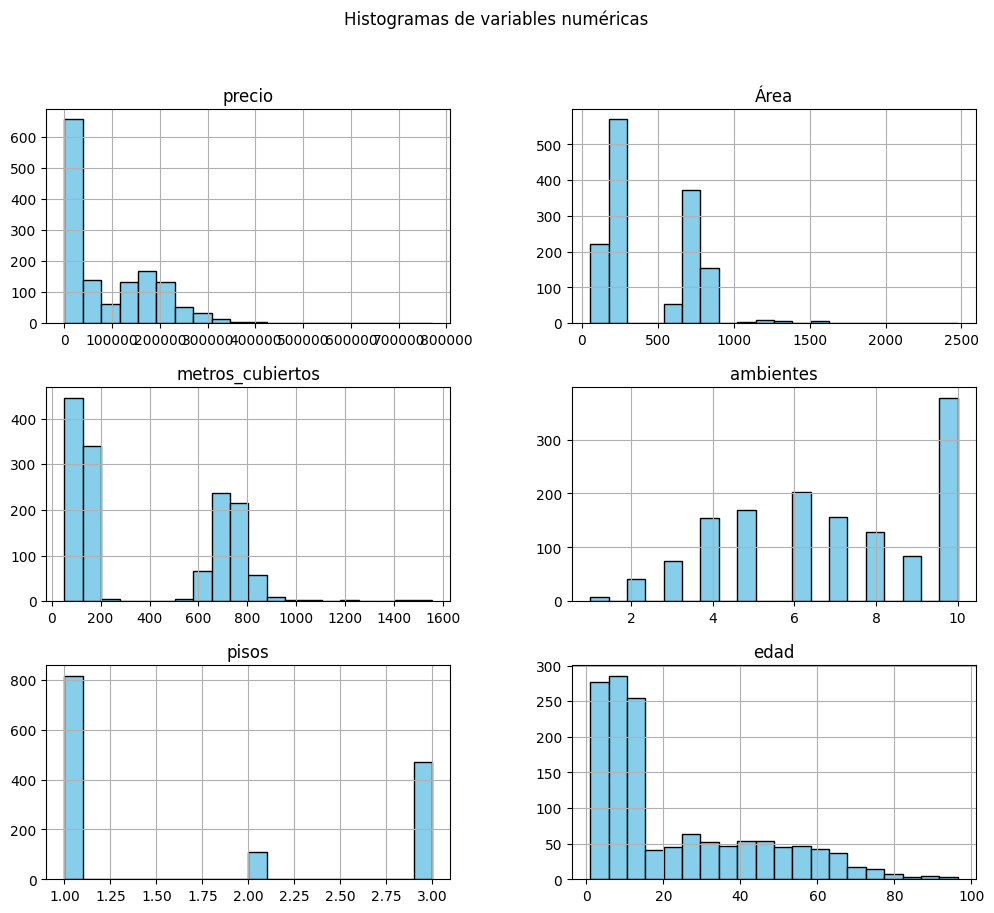

In [11]:
df.drop(columns=["lat", "lon"]).hist(figsize=(12,10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Histogramas de variables numéricas")
plt.show()

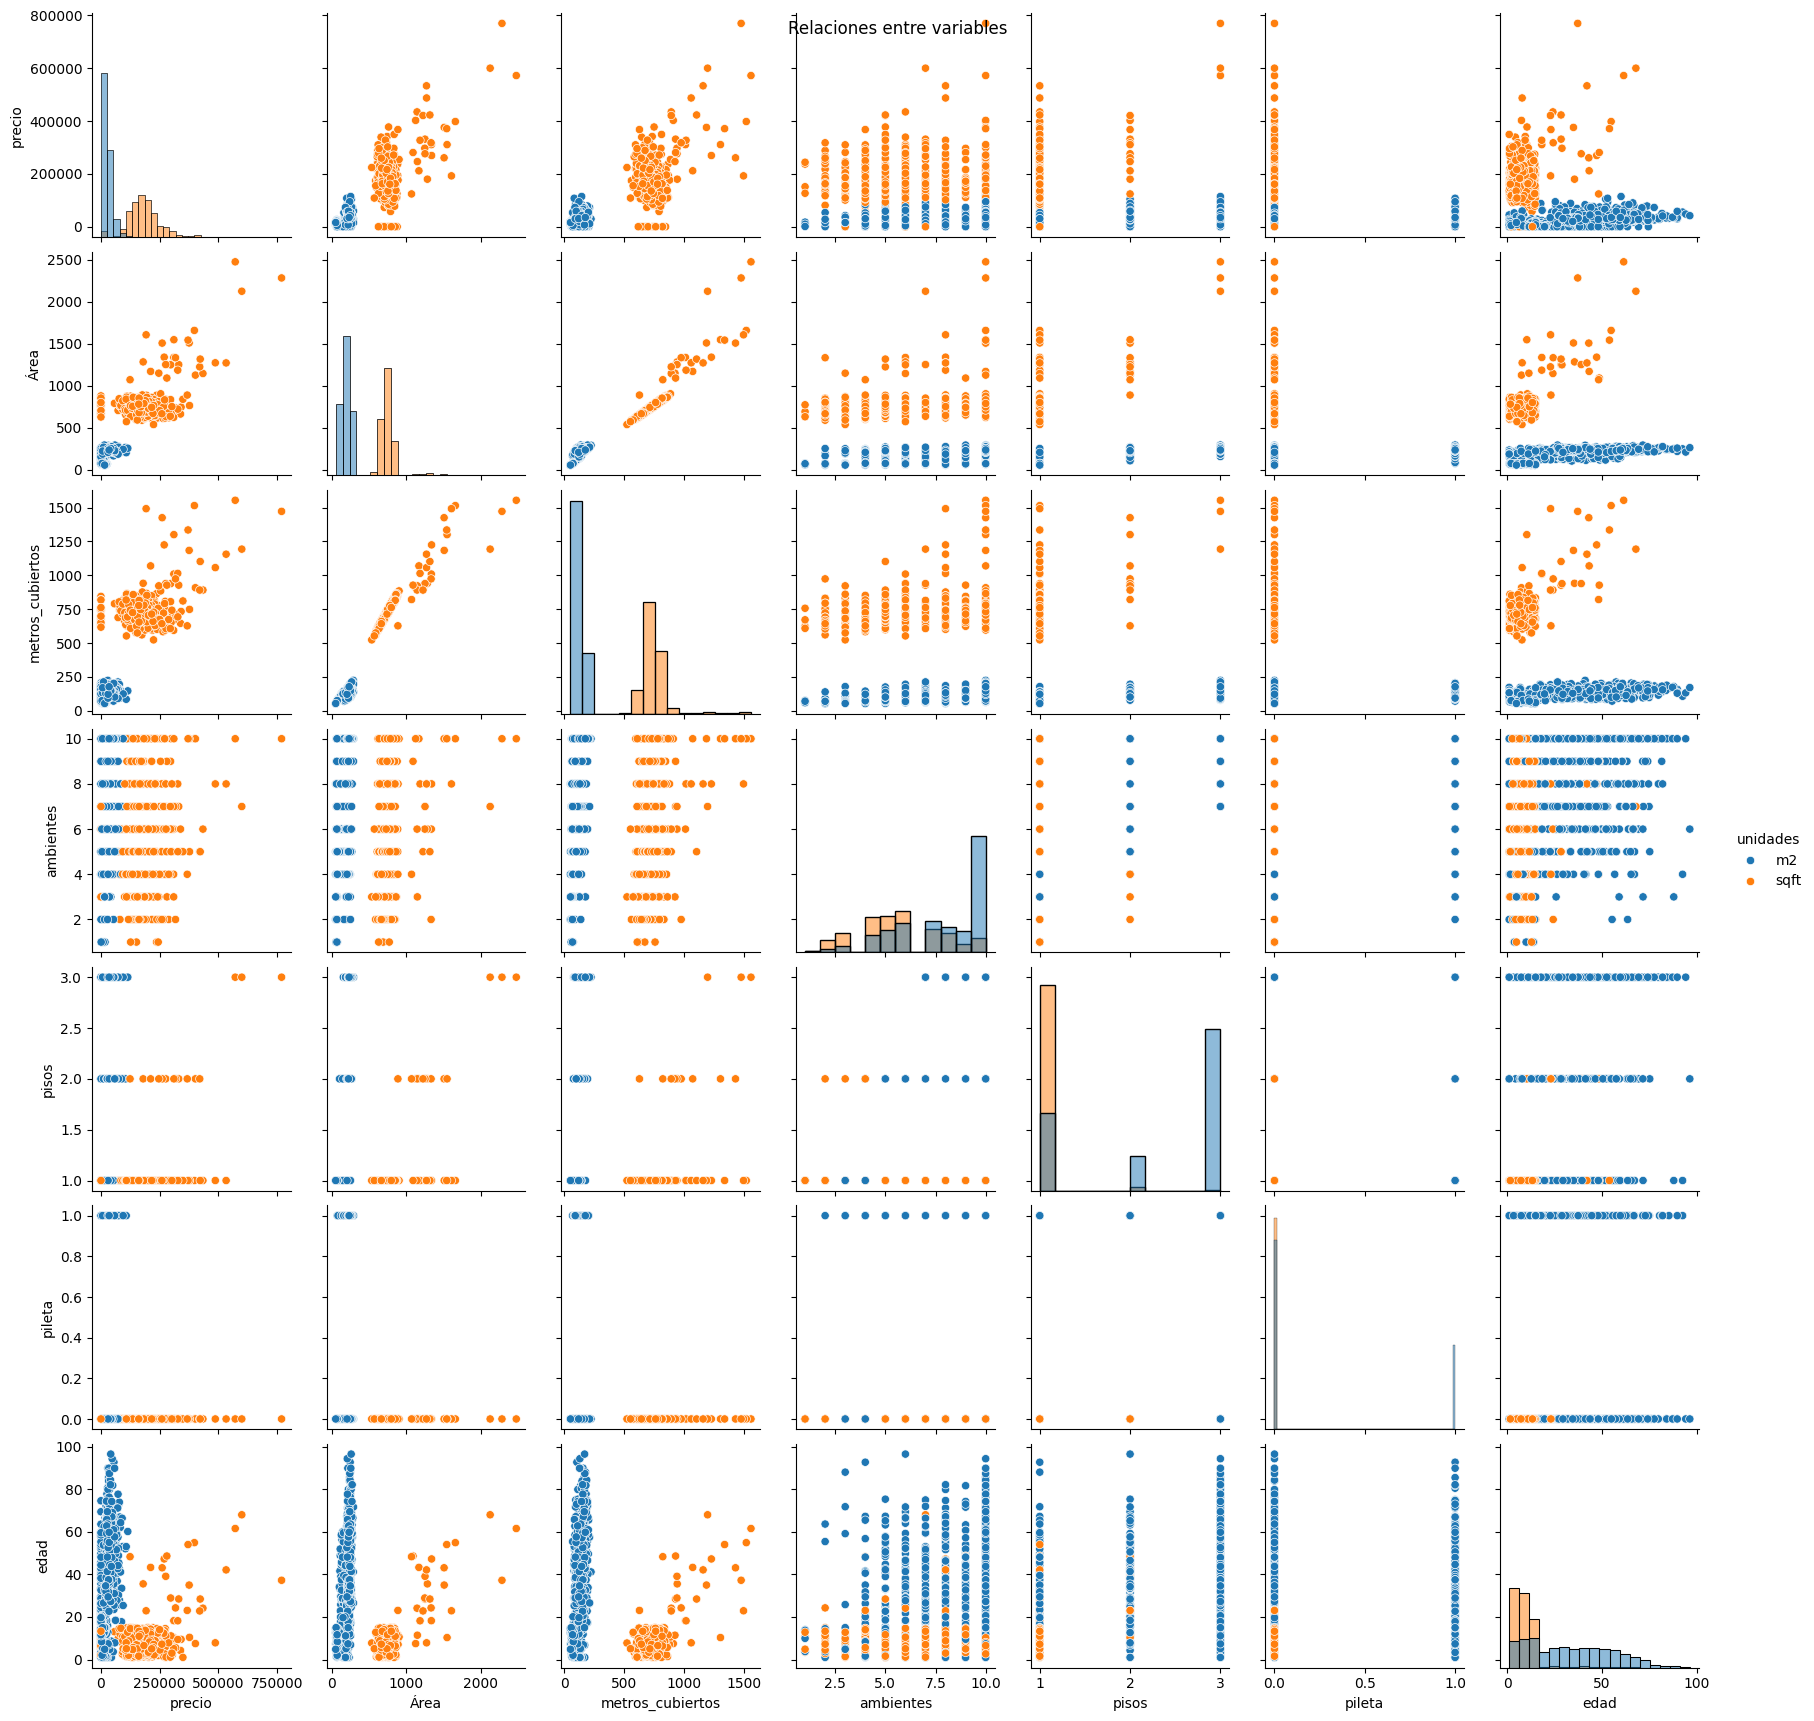

In [12]:
sns.pairplot(df[["precio", "tipo", "Área", "metros_cubiertos", "unidades", "ambientes", "pisos", "pileta", "edad"]], hue="unidades", diag_kind="hist")
plt.suptitle("Relaciones entre variables")
plt.show()

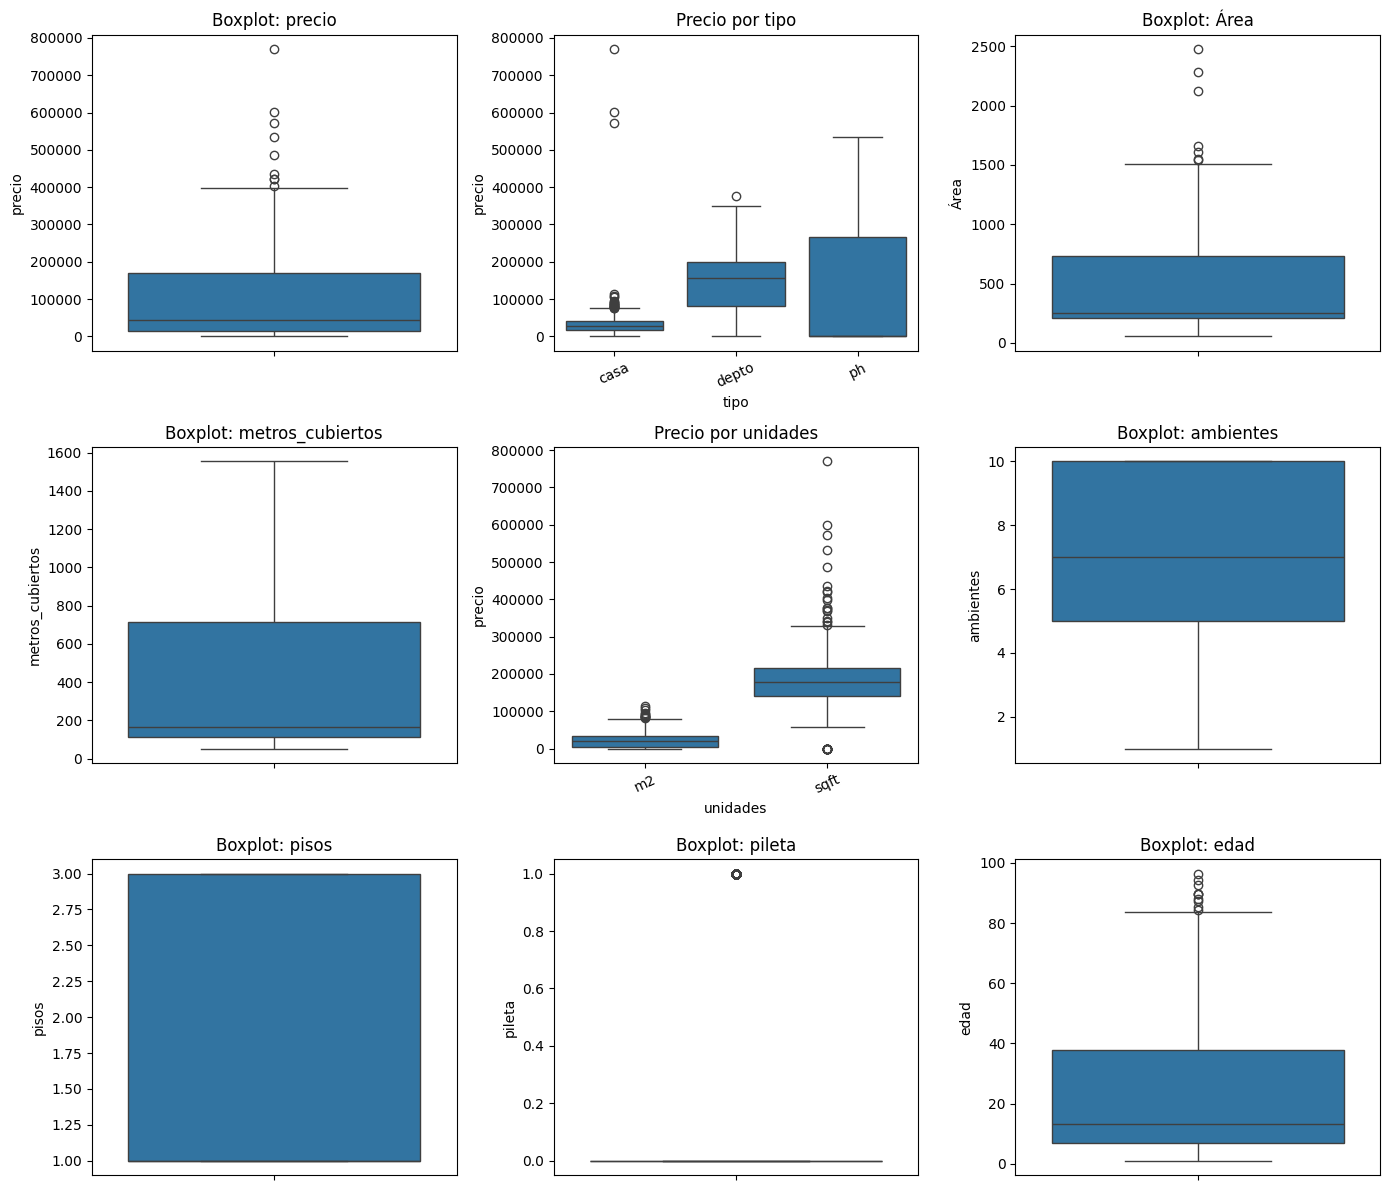

In [13]:
variables = ["precio", "tipo", "Área", "metros_cubiertos", "unidades",
             "ambientes", "pisos", "pileta", "edad"]

# --- BOXPLOTS: una grilla que se ajusta al número de variables ---
n_vars = len(variables)
cols = 3
rows = (n_vars + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
axes = axes.ravel()

# Recorro SOLO la cantidad de ejes disponibles
for ax, var in zip(axes, variables):
    if var not in df.columns:
        ax.set_visible(False)
        continue
    # si es numérica -> boxplot univariado
    if pd.api.types.is_numeric_dtype(df[var]):
        sns.boxplot(y=df[var], ax=ax)
        ax.set_title(f"Boxplot: {var}")
    else:
        # si es categórica y existe 'precio', muestro precio por categoría
        if "precio" in df.columns:
            sns.boxplot(x=df[var].astype(str), y=df["precio"], ax=ax)
            ax.set_title(f"Precio por {var}")
            ax.tick_params(axis="x", rotation=25)
        else:
            sns.countplot(x=df[var].astype(str), ax=ax)
            ax.set_title(f"Frecuencias de {var}")
            ax.tick_params(axis="x", rotation=25)

# Si sobran ejes (cuando rows*cols > n_vars), los borro
for j in range(n_vars, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
import folium
from IPython.display import display

center = [df["lat"].mean(), df["lon"].mean()]
m = folium.Map(location=center, zoom_start=11)

for _, row in df.iterrows():
    folium.CircleMarker([row["lat"], row["lon"]], radius=3, color="blue",
                        fill=True, fill_opacity=0.6).add_to(m)

display(m)    

In [14]:
def normalize_train (dataset):
    num_cols = dataset.select_dtypes(include=np.number).columns
    min_vals = dataset[num_cols].min()
    max_vals = dataset[num_cols].max()
    dataset[num_cols] = (dataset[num_cols] - min_vals) / (max_vals - min_vals)
    return dataset, min_vals, max_vals

def normalize_val (dataset, min_vals, max_vals):
    num_cols = dataset.select_dtypes(include=np.number).columns
    dataset[num_cols] = (dataset[num_cols] - min_vals) / (max_vals - min_vals)
    return dataset

def DeNormalize (y_pred_norm, min_vals, max_vals):
    return y_pred_norm * (max_vals["precio"] - min_vals["precio"]) + min_vals["precio"]

In [15]:
#Separo casas_dev.csv en train y val en 80/20 respectivamente

cut = int(0.8 * len(df))
train_idx = df.index[:cut]
val_idx = df.index[cut:]

train_dev =  df.loc[train_idx].reset_index(drop=True)
val_dev = df.loc[val_idx].reset_index(drop=True)

#Normalizo el dataset

train_dev, min_vals, max_vals = normalize_train(train_dev)
val_dev = normalize_val(val_dev, min_vals, max_vals)


In [90]:
#Modelo 1
y1_train  = pd.to_numeric(train_dev["precio"], errors="coerce")
xM1_train = train_dev[["Área"]].apply(pd.to_numeric, errors="coerce")

M1 = RegresionLineal(xM1_train, y1_train, bias = True).fit_pinv()

print("Modelo M1(Área vs Precio)")

M1.print_coef() 

print("Train")

print("MSE:", M1.mse(), ", R²:", M1.score())

print("Validation")

y1_val  = pd.to_numeric(val_dev["precio"], errors="coerce")
xM1_val = val_dev[["Área"]].apply(pd.to_numeric, errors="coerce")

print("MSE:", M1.mse(xM1_val, y1_val), ", R²:", M1.score(xM1_val, y1_val))

Modelo M1(Área vs Precio)
bias  : -0.01162
Área  : 0.82376
Train
MSE: 0.003620620832039093 , R²: 0.7635939287684292
Validation
MSE: 0.00393477325367648 , R²: 0.7493009336792447


In [91]:
#Modelo 2
y2_train  = pd.to_numeric(train_dev["precio"], errors="coerce")
xM2_train = train_dev[["Área", "pileta"]].apply(pd.to_numeric, errors="coerce")
xM2_train["pileta"] = xM2_train["pileta"].astype(int)
xM2_train = xM2_train.fillna(0).astype(float)

M2 = RegresionLineal(xM2_train, y2_train, bias = True).fit_pinv()

print("Modelo M2(Área y pileta vs Precio)")

M2.print_coef()

print("Train")
print("MSE:", M2.mse(), ", R² :", M2.score())

print("Validation")

y2_val  = pd.to_numeric(val_dev["precio"], errors="coerce")
xM2_val = val_dev[["Área", "pileta"]].apply(pd.to_numeric, errors="coerce")
xM2_val["pileta"] = xM2_val["pileta"].astype(int)
xM2_val = xM2_val.fillna(0).astype(float)

print("MSE:", M2.mse(xM2_val, y2_val), ", R²:", M2.score(xM2_val, y2_val))

Modelo M2(Área y pileta vs Precio)
bias    : -0.00929
Área    : 0.81712
pileta  : -0.00732
Train
MSE: 0.003613774739998134 , R² : 0.7640409398744725
Validation
MSE: 0.003933360584845098 , R²: 0.7493909400745857


In [92]:
#Modelo 3
caracteristicas = ["Área", "metros_cubiertos", "ambientes", "pisos", "edad", "pileta"]
xM3_train = train_dev[caracteristicas].apply(pd.to_numeric, errors="coerce")

for i in caracteristicas:
    xM3_train[i] = pd.to_numeric(xM3_train[i], errors="coerce")
    if xM3_train[i].dtype == "bool":
        xM3_train[i] = xM3_train[i].astype(int)

y3_train  = pd.to_numeric(train_dev["precio"], errors="coerce")

M3 = RegresionLineal(xM3_train, y3_train, bias = True).fit_pinv()

print("Modelo M3(6 caracteristicas vs Precio)")

M3.print_coef()

print("Train")

print("MSE:", M3.mse(), ", R² :", M3.score())

print("Validation")

y3_val  = pd.to_numeric(val_dev["precio"], errors="coerce")
xM3_val = val_dev[caracteristicas].apply(pd.to_numeric, errors="coerce")

for i in caracteristicas:
    xM3_val[i] = pd.to_numeric(xM3_val[i], errors="coerce")
    if xM3_val[i].dtype == "bool":
        xM3_val[i] = xM3_val[i].astype(int)

print("MSE:", M3.mse(xM3_val, y3_val), ", R²:", M3.score(xM3_val, y3_val))

Modelo M3(6 caracteristicas vs Precio)
bias              : 0.01471
Área              : 0.96902
metros_cubiertos  : -0.12414
ambientes         : -0.02016
pisos             : -0.02620
edad              : 0.00251
pileta            : 0.00296
Train
MSE: 0.0034901447290719067 , R² : 0.7721132806483959
Validation
MSE: 0.003943064275855888 , R²: 0.748772681760972


In [84]:
def new_features (dataset):

    for i in dataset:
        if i in ["precio", "tipo", "unidades", "lat", "lon", "pileta"]:
            continue
        else:
            dataset[f"{i}^2"] = dataset[i] ** 2

    return dataset

dataset = new_features(df)

dataset.head(20)


,precio,tipo,Área,metros_cubiertos,unidades,ambientes,pisos,pileta,lat,lon,...,Área^2,metros_cubiertos^2,ambientes^2,pisos^2,edad^2,Área^2^2,metros_cubiertos^2^2,ambientes^2^2,pisos^2^2,edad^2^2
1,42435.625078,casa,229.512155,113.935741,m2,4,1.0,True,-34.710794,-58.280446,...,52675.829336,12981.353089,16,1.0,4516.151545,2.774743e+09,1.685155e+08,256,1.0,2.039562e+07
3,135972.861876,depto,776.709623,747.693158,sqft,5,1.0,False,40.847320,-74.011712,...,603277.838574,559045.057800,25,1.0,191.421782,3.639442e+11,3.125314e+11,625,1.0,3.664230e+04
4,49758.465224,casa,249.165942,102.023922,m2,5,2.0,False,-34.777778,-58.255182,...,62083.666576,10408.880742,25,4.0,3994.253907,3.854382e+09,1.083448e+08,625,16.0,1.595406e+07
5,7256.796507,casa,170.849136,77.355172,m2,6,2.0,True,-34.693175,-58.240397,...,29189.427146,5983.822691,36,4.0,18.540710,8.520227e+08,3.580613e+07,1296,16.0,3.437579e+02
6,84.244291,ph,115.819630,89.400354,m2,7,1.0,False,-34.787597,-58.272506,...,13414.186691,7992.423364,49,1.0,2383.158122,1.799404e+08,6.387883e+07,2401,1.0,5.679443e+06
7,179452.480343,depto,851.461518,830.991007,sqft,2,1.0,False,40.817814,-74.035487,...,724986.715961,690546.053944,4,1.0,44.534916,5.256057e+11,4.768539e+11,16,1.0,1.983359e+03
8,15591.947673,casa,249.407740,156.759643,m2,10,3.0,False,-34.663340,-58.266494,...,62204.220842,24573.585529,100,9.0,749.673019,3.869365e+09,6.038611e+08,10000,81.0,5.620096e+05
9,221054.994134,depto,830.968041,821.480555,sqft,5,1.0,False,40.726963,-73.939846,...,690507.884675,674830.301464,25,1.0,223.899417,4.768011e+11,4.553959e+11,625,1.0,5.013095e+04
10,4036.981308,depto,80.794153,79.669227,m2,7,1.0,False,-34.811706,-58.278978,...,6527.695166,6347.185765,49,1.0,3.823964,4.261080e+07,4.028677e+07,2401,1.0,1.462270e+01
11,138411.417627,depto,834.642827,805.943032,sqft,6,1.0,False,40.700531,-74.044438,...,696628.649058,649544.170302,36,1.0,89.163147,4.852915e+11,4.219076e+11,1296,1.0,7.950067e+03


In [ ]:
#Separo casas_dev.csv en train y val en 80/20 respectivamente

cut = int(0.8 * len(dataset))
train_idx = dataset.index[:cut]
val_idx = dataset.index[cut:]

train_new_dev =  dataset.loc[train_idx].reset_index(drop=True)
val_new_dev = dataset.loc[val_idx].reset_index(drop=True)

#Normalizo el dataset

train_new_dev, min_vals, max_vals = normalize_train(train_new_dev)
val_new_dev = normalize_val(val_new_dev, min_vals, max_vals)

In [ ]:
#Modelo 4
xM4_train = train_new_dev[caracteristicas].apply(pd.to_numeric, errors="coerce")

for i in caracteristicas:
    xM4_train[i] = pd.to_numeric(xM4_train[i], errors="coerce")
    if xM4_train[i].dtype == "bool":
        xM4_train[i] = xM4_train[i].astype(int)

y4_train  = pd.to_numeric(train_dev["precio"], errors="coerce")

M3 = RegresionLineal(xM3_train, y3_train, bias = True).fit_pinv()

print("Modelo M3(nuevas caracteristicas vs Precio)")

M3.print_coef()

print("Train")

print("MSE:", M3.mse(), ", R² :", M3.score())

print("Validation")

y3_val  = pd.to_numeric(val_dev["precio"], errors="coerce")
xM3_val = val_new_dev[caracteristicas].apply(pd.to_numeric, errors="coerce")

for i in caracteristicas:
    xM3_val[i] = pd.to_numeric(xM3_val[i], errors="coerce")
    if xM3_val[i].dtype == "bool":
        xM3_val[i] = xM3_val[i].astype(int)

print("MSE:", M3.mse(xM3_val, y3_val), ", R²:", M3.score(xM3_val, y3_val))